<a href="https://colab.research.google.com/github/Adeseye1907/My_Project_Work/blob/main/Machine_Learning_Checkpoint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Dataset that was used is the House Price Regression dataset.

I chose this project because I’ve always been curious about what drives housing prices — particularly how physical property features like land size, number of rooms, or location affect value.

In many cities, property prices vary significantly even for similar-looking homes. I wanted to use data analysis and machine learning to find measurable patterns and quantify how much a feature like lot size contributes to price.

This problem is simple but very practical — real estate developers, buyers, and policymakers all rely on these kinds of models to make data-driven decisions.

The goal was to build a model that could predict the price of a house based on its lot size.

Given a dataset of houses with their lot sizes and prices, can we predict the price of a new house when we only know its lot size?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pyplot
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ds = pd.read_csv('/content/house_price_regression_dataset.csv')
ds.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [ ]:
ds.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [ ]:
ds.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
ds.shape

(1000, 8)

In [ ]:
num_data = ds.select_dtypes(include = ['number'])
cat = ds.select_dtypes(exclude = ['number'])
print('Numerical columns: \n')
display(num_data.head())
print('\nCategorical columns:')
display(cat.head())

Numerical columns: 



,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06



Categorical columns:


""
0
1
2
3
4


In [ ]:
num_data.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


<Axes: >

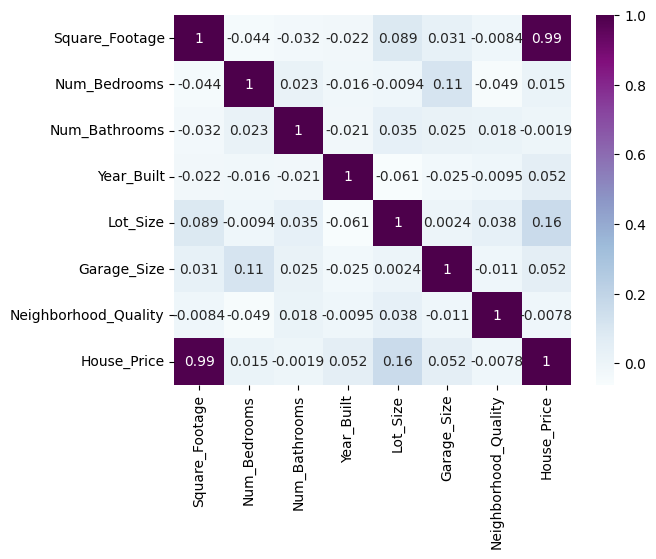

In [ ]:
sns.heatmap(num_data.corr(), annot=True, cmap='BuPu')

In [ ]:
#we scale our numerical variables because of their high standard deviation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler= StandardScaler()

for cols in ds.drop('House_Price', axis=1).columns:
  if ds[cols].dtypes != 'O':
    ds[cols] = scaler.fit_transform(ds[[cols]])
ds.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,-1.159803,-0.693836,-1.186699,-0.269122,-1.679278,-1.254658,-0.213126,2.623829e+05
1,1.160724,0.007008,1.252559,1.428045,1.522390,-0.027008,0.133420,9.852609e+05
2,0.618843,-1.394681,0.032930,1.428045,0.660422,-1.254658,1.173060,7.779774e+05
3,-1.473776,-1.394681,0.032930,-0.463084,-0.036555,-0.027008,0.826514,2.296989e+05
4,1.681887,-0.693836,-1.186699,0.312764,1.480809,-1.254658,0.826514,1.041741e+06


In [ ]:
#The std has been scaled
ds.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.220446e-17,-1.847411e-16,-1.421085e-16,2.209788e-15,3.552714e-17,-5.506706e-17,-1.048051e-16,6.188610e+05
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,2.535681e+05
min,-1.842733e+00,-1.394681e+00,-1.186699e+00,-1.772328e+00,-1.751414e+00,-1.254658e+00,-1.599312e+00,1.116269e+05
25%,-8.494167e-01,-6.938362e-01,-1.186699e+00,-8.510082e-01,-8.573045e-01,-1.254658e+00,-9.062192e-01,4.016482e+05
50%,3.751573e-02,7.008447e-03,3.292999e-02,-2.666977e-02,2.439999e-02,-2.700828e-02,1.334204e-01,6.282673e+05
75%,8.240407e-01,7.078531e-01,1.252559e+00,8.582818e-01,8.828109e-01,1.200641e+00,8.265135e-01,8.271413e+05
max,1.740059e+00,1.408698e+00,1.252559e+00,1.718988e+00,1.704535e+00,1.200641e+00,1.519607e+00,1.108237e+06


We are not encoding because there are no categorical columns

In [ ]:
#Splitting the dataset and then bringing n the model
from sklearn.model_selection import train_test_split
X = ds[['Lot_Size']]
y = ds['House_Price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=40)
print(f'xtrain:{xtrain.shape}')
print(f'xtest: {xtest.shape}')
print(f'ytrain: {ytrain.shape}')
print(f'ytest:{ytest.shape}')

xtrain:(800, 7)
xtest: (200, 7)
ytrain: (800,)
ytest:(200,)


In [ ]:
#We bring in the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

model = LinearRegression()
model.fit(xtrain, ytrain)
model

LinearRegression()

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
#We make the prediction and Evaluate the model
prediction = model.predict(xtrain)
r2_score(ytrain, prediction)

0.998513546909496

The prediction shows that it is a good model and it performs well

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

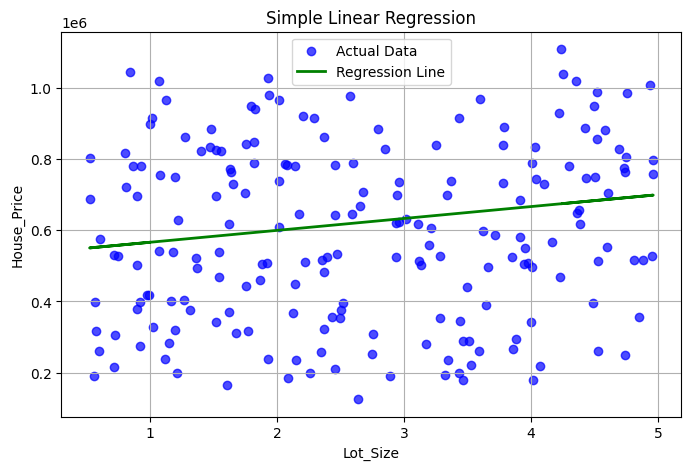

In [ ]:

# Visualize: Generate the plot as originally requested
plt.figure(figsize=(8, 5))

# Scatter plot of actual data (xtest vs ytest)
plt.scatter(X_test['Lot_Size'], y_test, color='blue', label='Actual Data', alpha=0.7)

# Plot the regression line (xtest vs y_pred)
plt.plot(X_test['Lot_Size'], y_pred, color='green', linewidth=2, label='Regression Line')

# Set labels and title
plt.xlabel('Lot_Size')
plt.ylabel('House_Price')
plt.title("Simple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()



Findings

The regression line shows a positive correlation between lot size and house price — as the lot size increases, the house price tends to rise.

The R² score indicates how well the model fits the data (closer to 1 means a better fit).

Based on results, lot size is a significant factor influencing house prices, though not the only one.

Challenges and How They Were Overcome
Challenge
Shape error:	Encountered ValueError: setting an array element with a sequence.

Fixed by ensuring x was a proper DataFrame using x = ds[['Lot_Size']].

Mismatched variable names:	Used x_test instead of xtest (caused NameError).

Ensured consistent variable naming throughout the script.

Unsorted regression line	The regression: line appeared jagged.	Sorted test values before plotting for a smoother line.

Non-numeric data:	Some numeric columns were read as strings.	Used pd.to_numeric() to convert columns to numeric types.